In [75]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-09-10 23:31:37,053: Credentials are already in use. The existing account in the session will be replaced.


# Chapter 9 - Monitoring and Optimizing circuits

## Monitoring and Tracking Jobs

In [76]:
# Import the Qiskit Jupyter tools 
from qiskit.tools import jupyter


In [77]:
# Initialize the job tracker to automatically track all jobs
%qiskit_job_watcher


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [78]:
# Let's run a simple circuit on the least busy quantum device 
# and check the job watcher widget.
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (2) and 
                                       not x.configuration().simulator 
                                       and x.status().operational==True))

#Create a simple circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
#Execute the circuit on the backend
job = execute(qc, backend)


In [79]:
#Disable the job watcher
%qiskit_disable_job_watcher


In [80]:
#Display the list of all available backends and provide 
#a brief overview of each 
%qiskit_backend_overview


# Transpiling a Circuit

In [81]:
# Import the transpiler passes object
from qiskit.transpiler import passes
# List out all the passes available
print(dir(passes))


['ApplyLayout', 'BarrierBeforeFinalMeasurements', 'BasicSwap', 'BasisTranslator', 'CSPLayout', 'CXCancellation', 'CXDirection', 'CheckCXDirection', 'CheckMap', 'Collect2qBlocks', 'CommutationAnalysis', 'CommutativeCancellation', 'ConsolidateBlocks', 'CountOps', 'CountOpsLongestPath', 'CrosstalkAdaptiveSchedule', 'DAGFixedPoint', 'DAGLongestPath', 'Decompose', 'DenseLayout', 'Depth', 'EnlargeWithAncilla', 'FixedPoint', 'FullAncillaAllocation', 'HoareOptimizer', 'Layout2qDistance', 'LayoutTransformation', 'LookaheadSwap', 'MergeAdjacentBarriers', 'NoiseAdaptiveLayout', 'NumTensorFactors', 'Optimize1qGates', 'OptimizeSwapBeforeMeasure', 'RemoveDiagonalGatesBeforeMeasure', 'RemoveFinalMeasurements', 'RemoveResetInZeroState', 'ResourceEstimation', 'SabreLayout', 'SabreSwap', 'SetLayout', 'Size', 'StochasticSwap', 'TrivialLayout', 'UnitarySynthesis', 'Unroll3qOrMore', 'UnrollCustomDefinitions', 'Unroller', 'Width', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__'

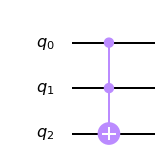

In [82]:
#Basic Toffoli gate,
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()


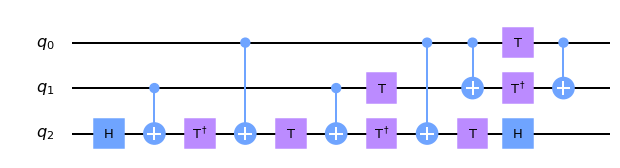

In [83]:
qc_decomposed = qc.decompose()
qc_decomposed.draw()


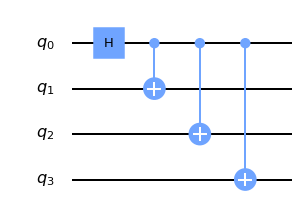

In [84]:
#Basic circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()


In [85]:
#Print the depth of both inital and decomposed circuit
print('Initial circuit depth: ', qc.depth())
print('Decomposed circuit depth: ', qc_decomposed.depth())
#Get the number of operators in initial circuit
print('Initial circuit operation count: ', qc.count_ops())
#Get the number of operators in decomposed circuit
print('Decomposed circuit operation count: ', qc_decomposed.count_ops())


Initial circuit depth:  4
Decomposed circuit depth:  11
Initial circuit operation count:  OrderedDict([('cx', 3), ('h', 1)])
Decomposed circuit operation count:  OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])


# Configuration and Optimization

In [86]:
# Get the backend device: ibmq_santiago 
backend_santiago = provider.get_backend('ibmq_santiago')
# Launch backend viewer of ibmq_santiago
backend_santiago


<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [87]:
# Get the backend device: ibmq_16_melbourne
backend_melbourne = provider.get_backend('ibmq_16_melbourne')
# Launch backend viewer of ibmq_16_melbourne
backend_melbourne


<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

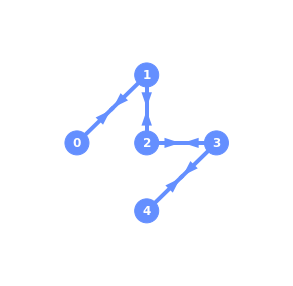

In [88]:
# Visualize the coupling directional map between the qubits 
plot_gate_map(backend_santiago, plot_directed=True)


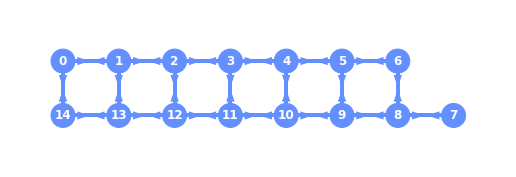

In [89]:
# Visualize the coupling directional map between the qubits 
plot_gate_map(backend_melbourne, plot_directed=True)


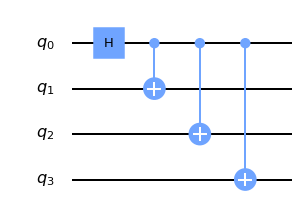

In [90]:
# Quantum circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()


Depth: 10


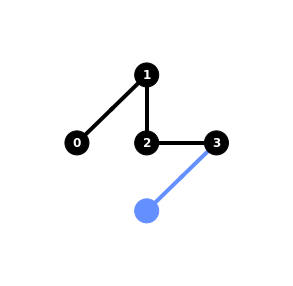

In [91]:
# Transpile the circuit with an optimization level = 0
qc_santiago_0 = transpile(qc, backend_santiago, 
seed_transpiler=10258, optimization_level=0)
# Print out the depth of the circuit
print('Depth:', qc_santiago_0.depth())
# Plot the resulting layout of the quantum circuit after Layout
plot_circuit_layout(qc_santiago_0, backend_santiago)


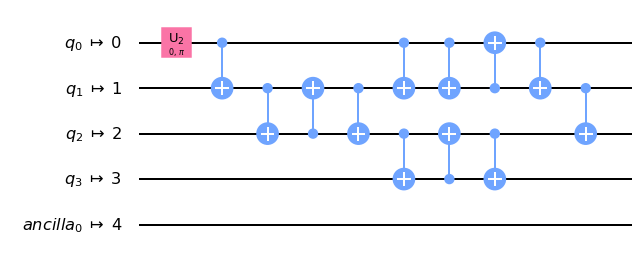

In [92]:
# Draw the transpiled circuit pertaining to Santiago
qc_santiago_0.draw()


Depth: 10


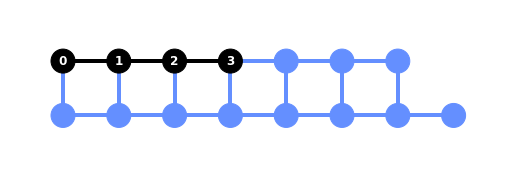

In [93]:
# View the transpiled circuit with an optimization level = 0
qc_melbourne_0 = transpile(qc, backend_melbourne, seed_transpiler=10258, optimization_level=0)
print('Depth:', qc_melbourne_0.depth())
plot_circuit_layout(qc_melbourne_0, backend_melbourne)


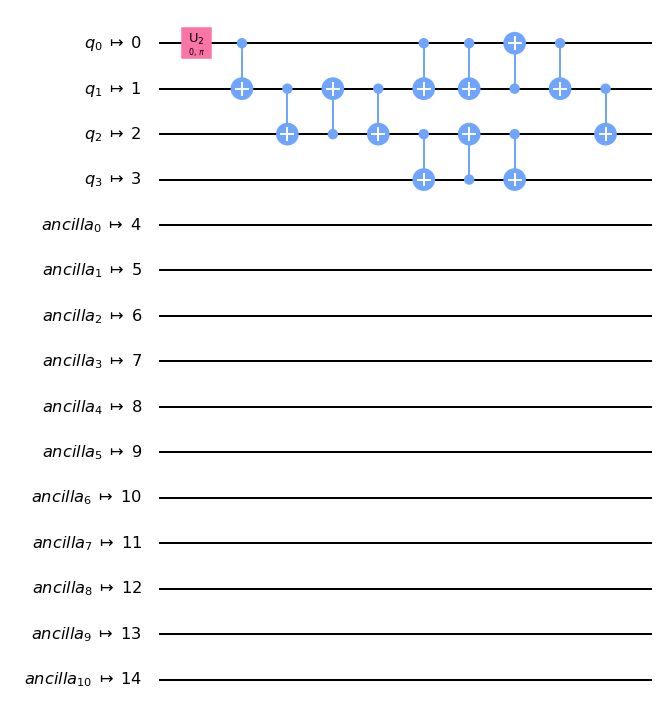

In [94]:
# Draw the transpiled circuit pertaining to Melbourne
qc_melbourne_0.draw()


Depth: 11
Ops count:  OrderedDict([('cx', 10), ('u2', 7)])


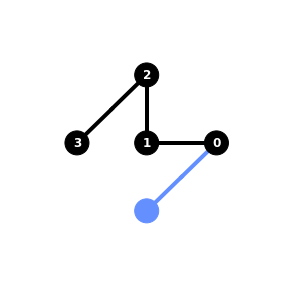

In [95]:
# Transpile the circuit with the optimization level = 3
qc_transpiled_santiago = transpile(qc, backend_santiago, optimization_level=3)
# Print the depth of the transpiled circuit
print('Depth:', qc_transpiled_santiago.depth())
# Print the number of operations of the transpiled circuit
print('Ops count: ', qc_transpiled_santiago.count_ops())
# Plot the layout mapping of the transpiled circuit
plot_circuit_layout(qc_transpiled_santiago, backend_santiago)


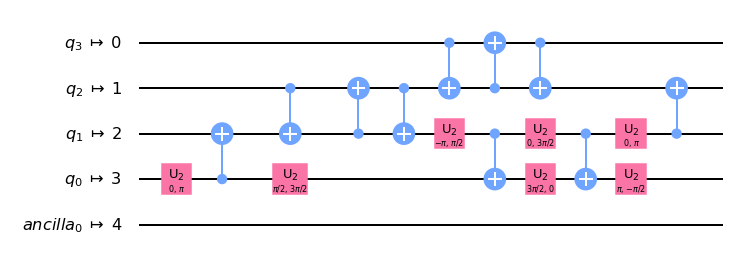

In [96]:
# Redraw the transpiled circuit at new level
qc_transpiled_santiago.draw()


Depth: 4
Ops count:  OrderedDict([('cx', 3), ('u2', 1)])


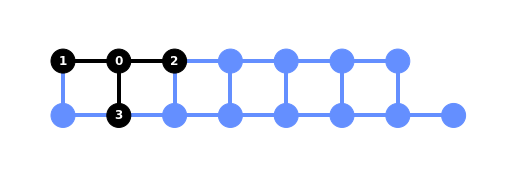

In [97]:
# Transpile the quantum circuit with the optimization level = 3
qc_transpiled_melbourne = transpile(qc, backend_melbourne, optimization_level=3)
# Get the depth and operation count of the transpiled circuit. 
print('Depth:', qc_transpiled_melbourne.depth())
print('Ops count: ', qc_transpiled_melbourne.count_ops())
# Print the circuit layout
plot_circuit_layout(qc_transpiled_melbourne, backend_melbourne)


In [98]:
# View the ibmqx2 backend device configuration and properties
backend = provider.get_backend('ibmqx2')
backend


<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [99]:
# View the backend coupling map, displayed as CNOTs (Control-Target)
backend = provider.get_backend('ibmqx2')
# Extract the coupling map from the backend
ibmqx2_coupling_map = backend.configuration().coupling_map
# List out the extracted coupling map
ibmqx2_coupling_map


[[0, 1],
 [0, 2],
 [1, 0],
 [1, 2],
 [2, 0],
 [2, 1],
 [2, 3],
 [2, 4],
 [3, 2],
 [3, 4],
 [4, 2],
 [4, 3]]

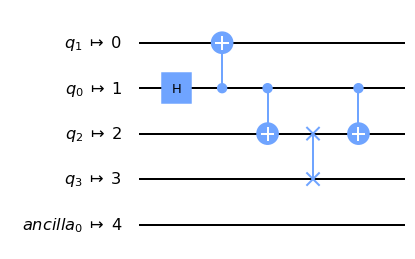

In [100]:
# Transpile a custom circuit using only the coupling map. 
# Set the backend to ‘None’ so it will force using the coupling map provided.
qc_custom = transpile(qc, backend=None, 
coupling_map=ibmqx2_coupling_map)
# Draw the resulting custom topology circuit.
qc_custom.draw()


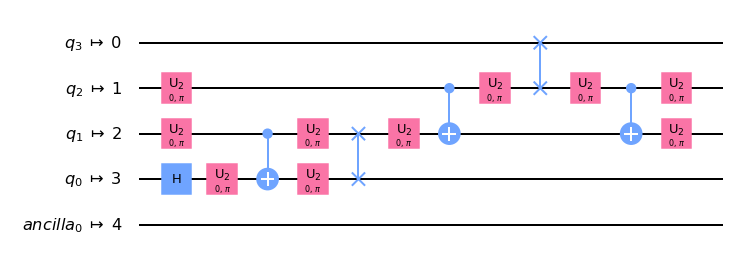

In [101]:
# Create our own coupling map (custom topology)
custom_linear_topology = [[0,1],[1,2],[2,3],[3,4]]
# Set the coupling map to our custom linear topology
qc_custom = transpile(qc, backend=None, coupling_map=custom_linear_topology)
# Draw the resulting circuit.
qc_custom.draw()


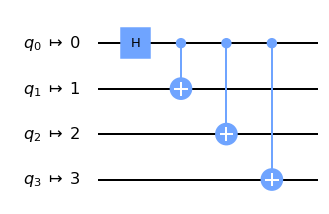

In [103]:
# Import the PassManager and a few Passes
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import TrivialLayout, BasicSwap
# Create a TrivialLayout based on the ibmqx2 coupling map
trivial = TrivialLayout(CouplingMap(ibmqx2_coupling_map))

pm = PassManager()
# Append the TrivialLayout to the PassManager
pm.append(trivial)
# Run the PassManager and draw the resulting circuit
tv_qc = pm.run(qc)
tv_qc.draw()


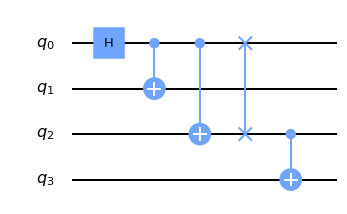

In [104]:
# Create a BasicSwap based on the ibmqx2 coupling map we used earlier
basic_swap = BasicSwap(CouplingMap(ibmqx2_coupling_map))
#Add the BasicSwap to the PassManager
pm = PassManager(basic_swap)
# Run the PassManager and draw the results
new_qc = pm.run(qc)
new_qc.draw()


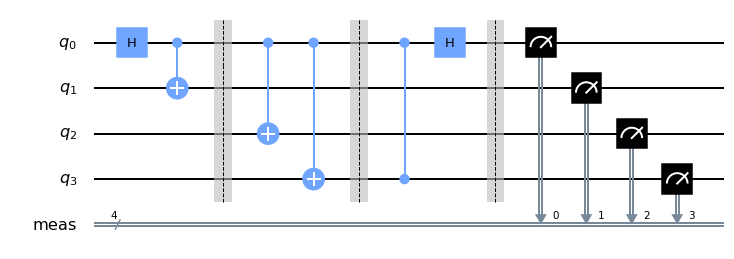

In [105]:
# Sample quantum circuit 
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.cx(0,2)
qc.cx(0,3)
qc.barrier()
qc.cz(3,0)
qc.h(0)
qc.measure_all()
# Draw the circuit using the default renderer
qc.draw()


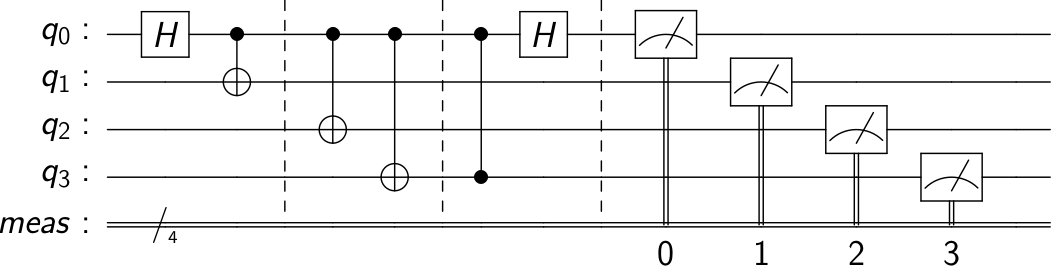

In [107]:
qc.draw('latex')

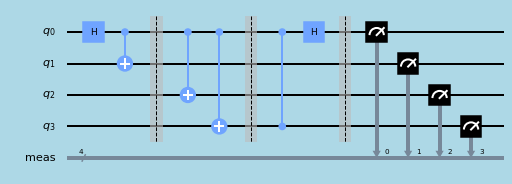

In [108]:
# Define the style to render the circuit and components
style = {'backgroundcolor': 'lightblue','gatefacecolor': 'white', 'gatetextcolor': 'black', 'fontsize': 9}
# Draw the mpl with the specified style
qc.draw(style=style)


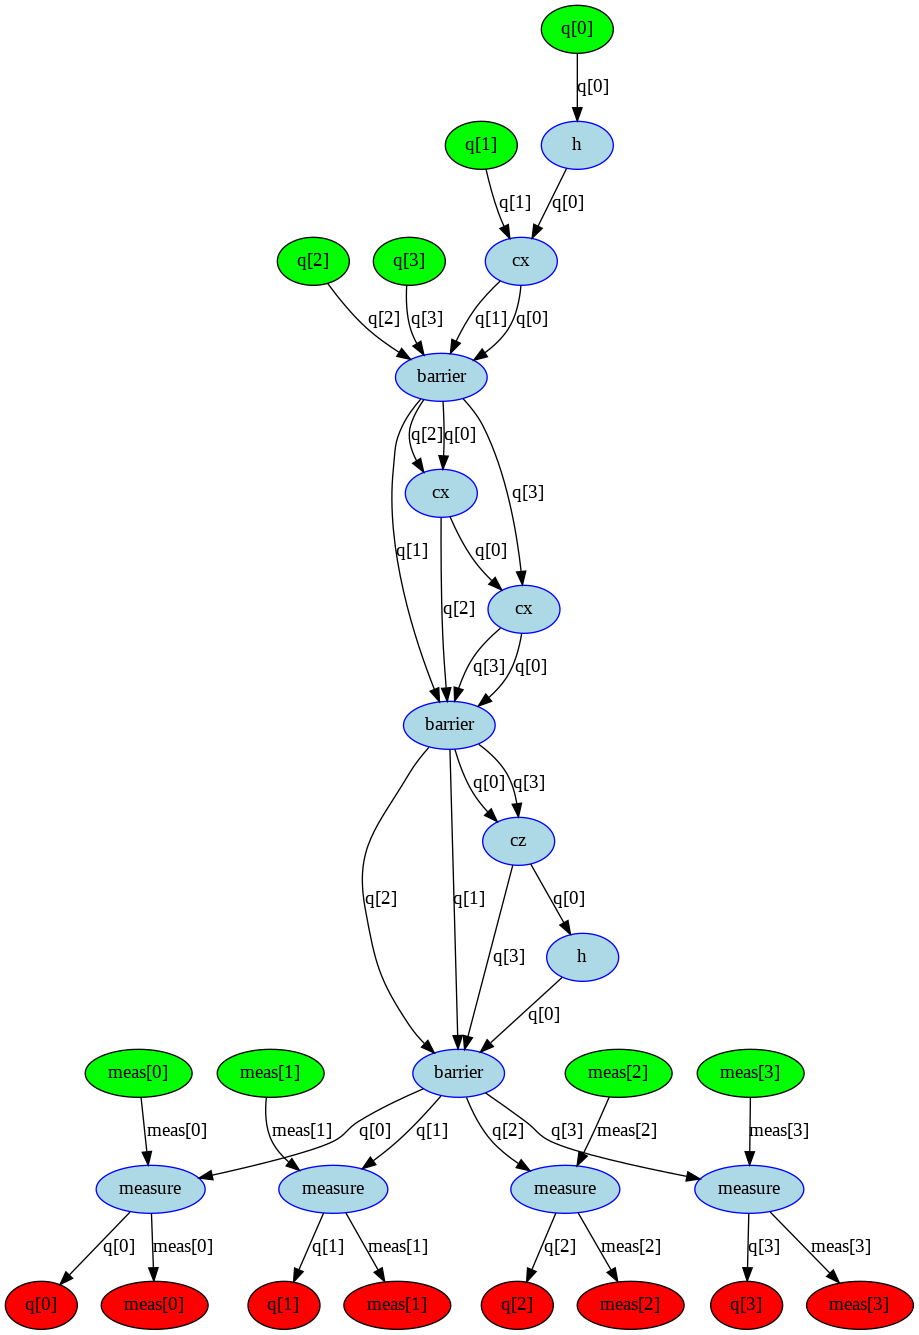

In [109]:
# Import the Circuit to DAG converter
from qiskit.converters import circuit_to_dag
# Import the DAG drawer
from qiskit.tools.visualization import dag_drawer
# Convert the circuit into a DAG
dag = circuit_to_dag(qc)
# Draw the DAG of the circuit
dag_drawer(dag)
